In [133]:
import random

In [134]:
class GameOfLife:
    
    def __init__(self, width, height):  
        self.width = width
        self.height = height
        
        self.matrix = [[0 for j in range(width)] for i in range(height)] # создание нулевой матрицы заданного размера
        
    # красивый вывод матрицы    
    def __str__(self): 
        result = ''
        for row in self.matrix:
            result += '\n' + str(row)
        return result.strip()
    
    def get_matrix(self):
        return self.matrix  
    
    # случайное заполнение единицами
    def random_fill(self, percent):
        
        for i in range(self.height):        
            for j in range(self.width):
                if random.random() <= percent:
                    self.matrix[i][j] = 1
                    
        return self.matrix
    
    # рассчет количества соседей по координатам   
    def neighbor_count(self, i, j):
        k = 0
        shift = [-1, 0, 1]        
        for i_shift in shift:
            for j_shift in shift:
                i_neighbor = i+i_shift
                j_neighbor = j+j_shift
                 #  координаты соседей корректны (нет отрицательных, т.к. нельзя "замыкать круг") и значение соседа равно единице
                if i_neighbor in range(self.height) and j_neighbor in range(self.width) and self.matrix[i_neighbor][j_neighbor] == 1:
                    k += 1
        # если центральная точка равна 1, то нужно скорректировтаь значение
        if self.matrix[i][j] == 1:
            k -= 1
        return k
    
    def step(self):        
        # дублируем текущую матрицу о временную, чтобы шаг обновления выполся "в один кард"
        matrix_tmp = self.matrix
        
        k = 0
        
        # проходим по всей матрице
        for i in range(self.height):        
            for j in range(self.width):
                # считаем кол-во соседей
                k = self.neighbor_count(i, j)
                
                ## ЛОГИКА ##
                # если текущая ячейка содержит единицу
                if self.matrix[i][j] == 1:
                    # и рядом 2 или 3
                    if k == 2 or k == 3:
                        pass # то ничего не делаем                    
                    else: # иначе обнулить
                        #print(i,':',j,'|','value =',self.matrix[i][j],'|', 'k =',k,'|', 'to 0') # для отладки
                        matrix_tmp[i][j] = 0
                # если текущая ячейка содержит ноль    
                if self.matrix[i][j] == 0:
                    # и рядом 3
                    if k == 3:          
                        #print(i,':',j,'|','value =',self.matrix[i][j],'|', 'k =',k,'|', 'to 1') # для отладки
                        matrix_tmp[i][j] = 1
                    else:
                        pass 
                    
        # применяем обновления                
        self.matrix = matrix_tmp            
        return self.matrix

In [ ]:
# запуск без графики

g = GameOfLife(10,10)
g.random_fill(0.3)

for i in range(10):
    g.step()
    print('\n','generation',i)
    print(g)

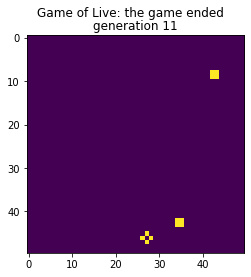

In [204]:
# графический режим
%matplotlib inline
import pylab as pl
from IPython import display
import copy

# начальные параметры игры
g = GameOfLife(50,50)
g.random_fill(0.05)

i = 0 # счетчик итераций
alive = True
while alive:    
    try:
        matrix_old = copy.deepcopy(g.get_matrix()) # нужно сохранить не ссылку не объект, а сами значнеия
        g.step()   
        matrix = g.get_matrix()
        pl.clf()
        pl.imshow(matrix)
        pl.suptitle('Game of Live: the game is active')
        pl.title('generation ' + str(i))
        display.display(pl.gcf())
        display.clear_output(wait=True)
        i += 1        
        if matrix_old == matrix: # если одно поколение остется без изменений, значит игра окончена
            alive = False
            pl.suptitle('Game of Live: the game ended')
    except KeyboardInterrupt:
        break